In [2]:
%matplotlib inline

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import datetime as dt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle

conn=pymysql.connect("www.a667.com","kairuitouzi","kai070122","carry_investment",charset='utf8' ) 
sql="SELECT  * FROM wh_same_month_min WHERE prodcode='HSI'"
sql="SELECT  * FROM wh_same_month_day WHERE prodcode='HSI'"
df1=pd.read_sql(sql,conn)
df1.set_index('datetime',inplace=True)
df1['Time']=df1.index.time
df1['Date']=df1.index.date
df1

,prodcode,open,high,low,close,vol,position,settlement,ratio,id,Time,Date
datetime,,,,,,,,,,,,
1992-02-03 16:15:00,HSI,4695.0,4710.0,4695.0,4710.0,0.0,254,4710.0,0.500000,6522,16:15:00,1992-02-03
1992-02-07 16:15:00,HSI,4723.0,4752.0,4719.0,4740.0,0.0,254,4740.0,0.500000,6523,16:15:00,1992-02-07
1992-02-10 16:15:00,HSI,4715.0,4784.0,4715.0,4775.0,0.0,254,4775.0,0.500000,6524,16:15:00,1992-02-10
1992-02-11 16:15:00,HSI,4775.0,4775.0,4728.0,4738.0,0.0,254,4738.0,0.500000,6525,16:15:00,1992-02-11
1992-02-12 16:15:00,HSI,4740.0,4775.0,4740.0,4775.0,0.0,254,4775.0,0.500000,6526,16:15:00,1992-02-12
1992-02-13 16:15:00,HSI,4790.0,4806.0,4780.0,4800.0,0.0,254,4800.0,0.500000,6527,16:15:00,1992-02-13
1992-02-14 16:15:00,HSI,4805.0,4820.0,4784.0,4792.0,0.0,254,4792.0,0.500000,6528,16:15:00,1992-02-14
1992-02-17 16:15:00,HSI,4800.0,4800.0,4770.0,4776.0,0.0,254,4776.0,0.500000,6529,16:15:00,1992-02-17
1992-02-18 16:15:00,HSI,4765.0,4805.0,4765.0,4784.0,0.0,254,4784.0,0.500000,6530,16:15:00,1992-02-18


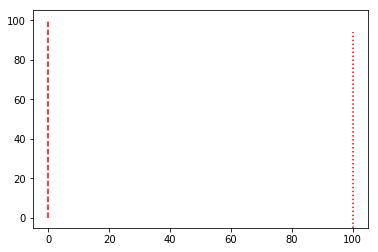

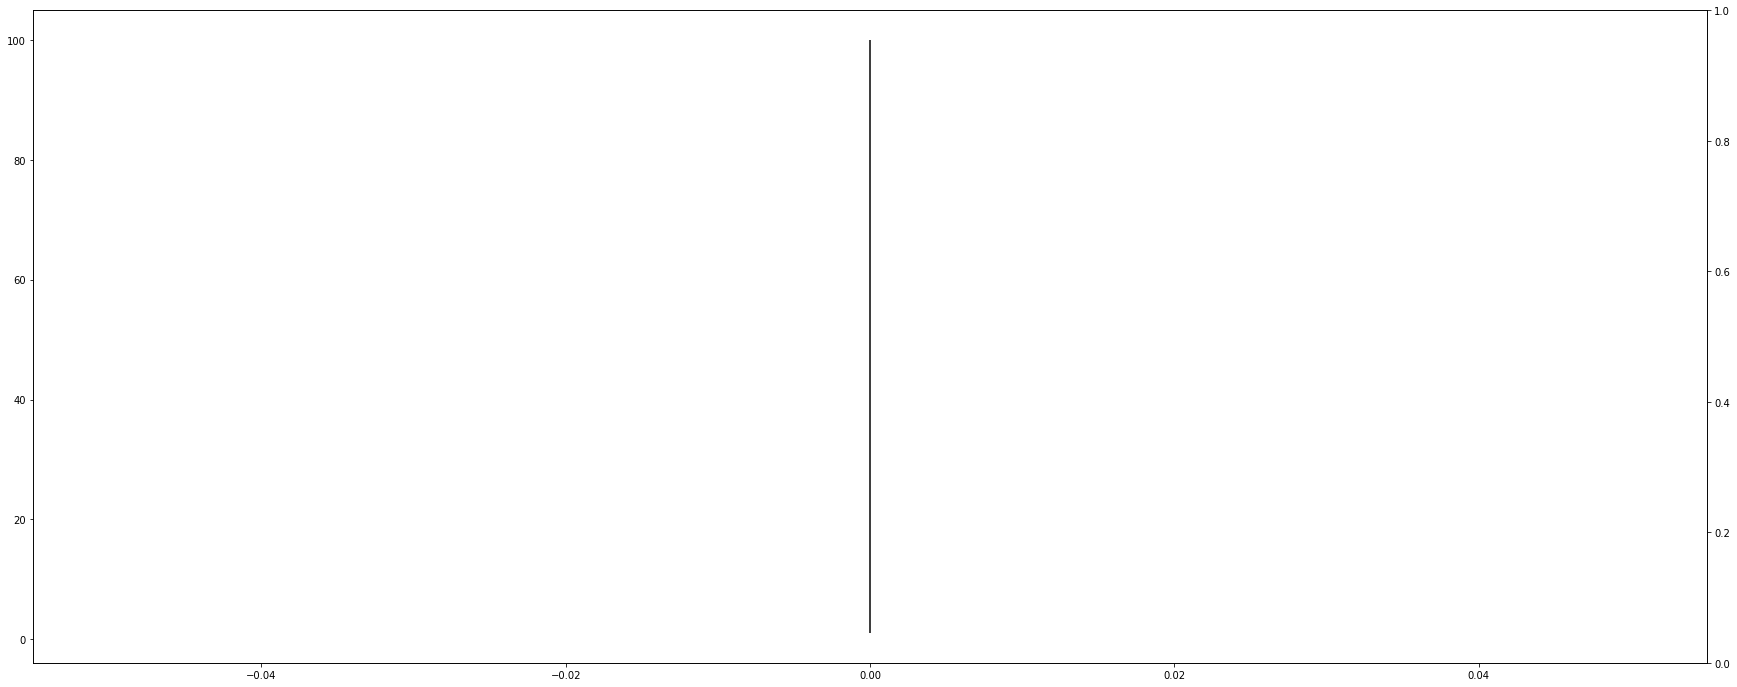

In [179]:
ax=plt.plot()
plt.vlines (0, 0,100,colors = "r", linestyles = "dashed")
plt.axvline(100,ymax=0.9,c='r',ls='dotted')
fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot(111)
ax1 = ax.twinx()
lin1=ax.vlines(0,100,ymax=1)


In [41]:
#取当天1分钟K线的话
dt1=dt.date(2019,3,21)
tm1=dt.time(9)
df9=df1[(df1.Date==dt1) & (df1.Time>tm1)]
length=len(df9)
df9['close'].values

array([ 29384.,  29434.,  29428.,  29417.,  29424.,  29432.,  29430.,
        29421.,  29421.,  29408.,  29404.,  29405.,  29402.,  29401.,
        29414.,  29401.,  29402.,  29430.,  29419.,  29412.,  29385.,
        29373.,  29362.,  29356.,  29364.,  29378.,  29374.,  29399.,
        29396.,  29380.,  29365.,  29360.,  29391.,  29410.,  29441.,
        29452.,  29424.,  29434.,  29411.,  29405.,  29370.,  29361.,
        29382.,  29401.,  29381.,  29379.,  29385.,  29404.,  29415.,
        29416.,  29421.,  29418.,  29413.,  29417.,  29407.,  29405.,
        29399.,  29390.,  29393.,  29424.,  29445.,  29421.,  29408.,
        29409.,  29402.,  29394.,  29403.,  29408.,  29420.,  29424.,
        29405.,  29430.,  29417.,  29419.,  29418.,  29440.,  29442.,
        29430.,  29433.,  29421.,  29430.,  29444.,  29473.,  29431.,
        29442.,  29459.,  29452.,  29469.,  29467.,  29465.,  29449.,
        29461.,  29472.,  29472.,  29459.,  29458.,  29450.,  29437.,
        29420.,  294

In [3]:
#------calc corrcoef 相关性
#匹配的K线个数
length=100
vv1=df1.tail(length)['close'].values
vv2=df1['close'].values
rows=len(vv2)

maxCorr=0
res=[]
resList=[]
# dt1=dt.datetime.now
for i in range(0,rows-length*2):
    vv3=vv2[i:length+i]
    corr=round(np.corrcoef(vv1,vv3)[0][1],3)
    resList.append([i,corr])
    if corr>maxCorr:
        maxCorr=corr
        res=[i,maxCorr]

print(res)

recc=pd.DataFrame(resList)
recc.columns=['No','Res']
newRec=recc.sort_values('Res',ascending=False)
newRec.head(20)

[2429, 0.864]


,No,Res
2429,2429,0.864
1571,1571,0.863
2430,2430,0.860
1570,1570,0.860
1572,1572,0.853
1569,1569,0.850
5949,5949,0.849
1568,1568,0.848
5948,5948,0.843
1567,1567,0.843


In [113]:
index=newRec.index[6]
leng=100
tmp=vv2[index:index+leng]
res1=[tmp.max(),tmp.min(),tmp.mean(),tmp.size,tmp.var(),tmp.ptp()]
data2=vv2[index+leng:index+leng*2]
res2=[data2.max(),data2.min(),data2.mean(),data2.size,data2.var(),data2.ptp()]
print(np.where(data2>tmp.mean())[0].size)
print(np.where(data2>tmp.min())[0].size)
print(np.where(data2>tmp.max())[0].size)
print(np.where(data2<tmp.mean())[0].size)
print(np.where(data2<tmp.min())[0].size)
print(np.where(data2<tmp.max())[0].size)
print(res1)
print(res2)

100
100
39
0
0
61
[23059.0, 19605.0, 21119.38, 100, 943799.2956000001, 3454.0]
[24084.0, 21538.0, 22909.76, 100, 341676.5024, 2546.0]


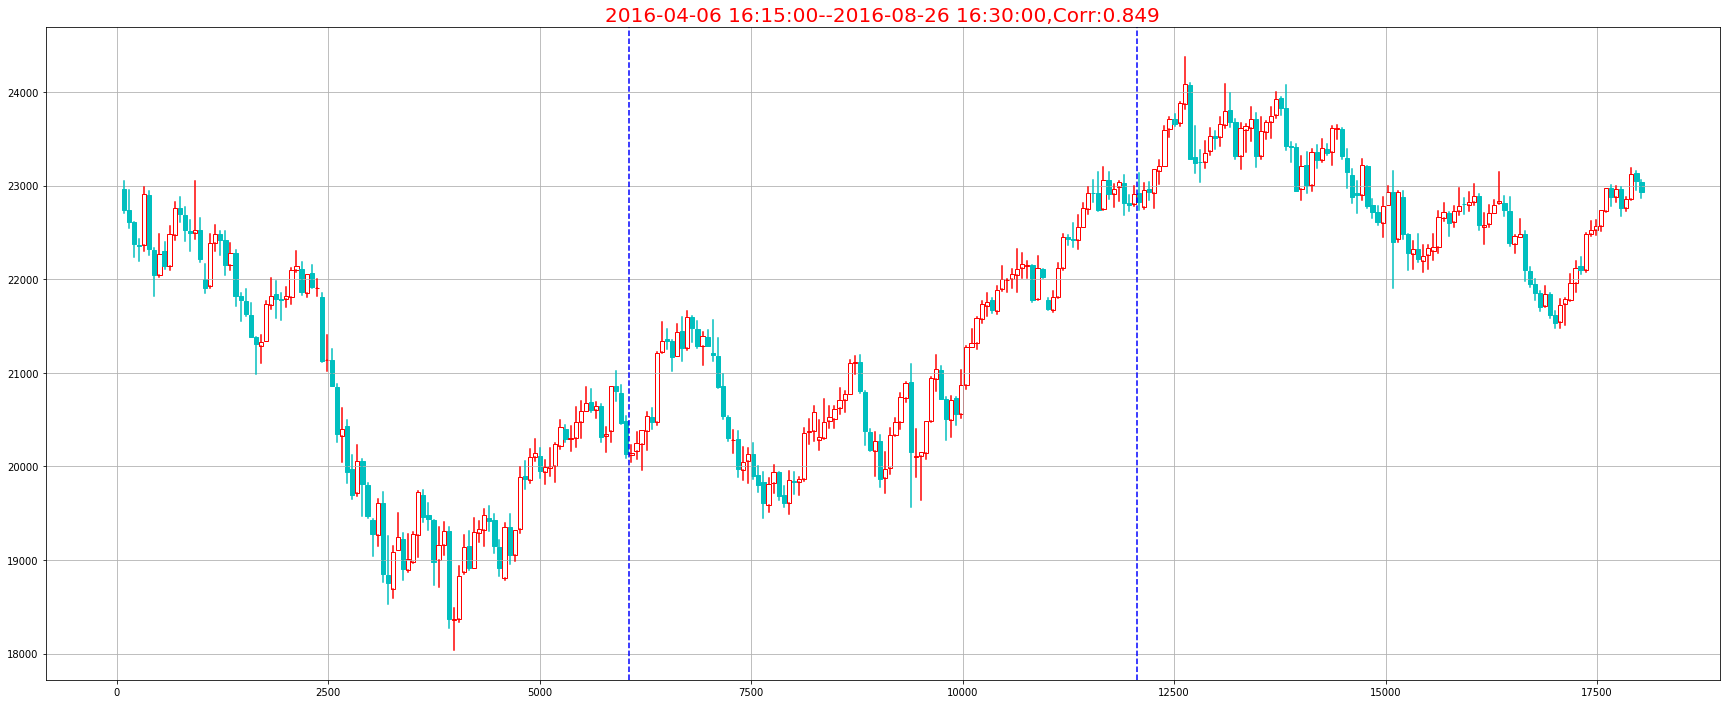

In [109]:
fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot(111)

DrawIndex(6,100,100)

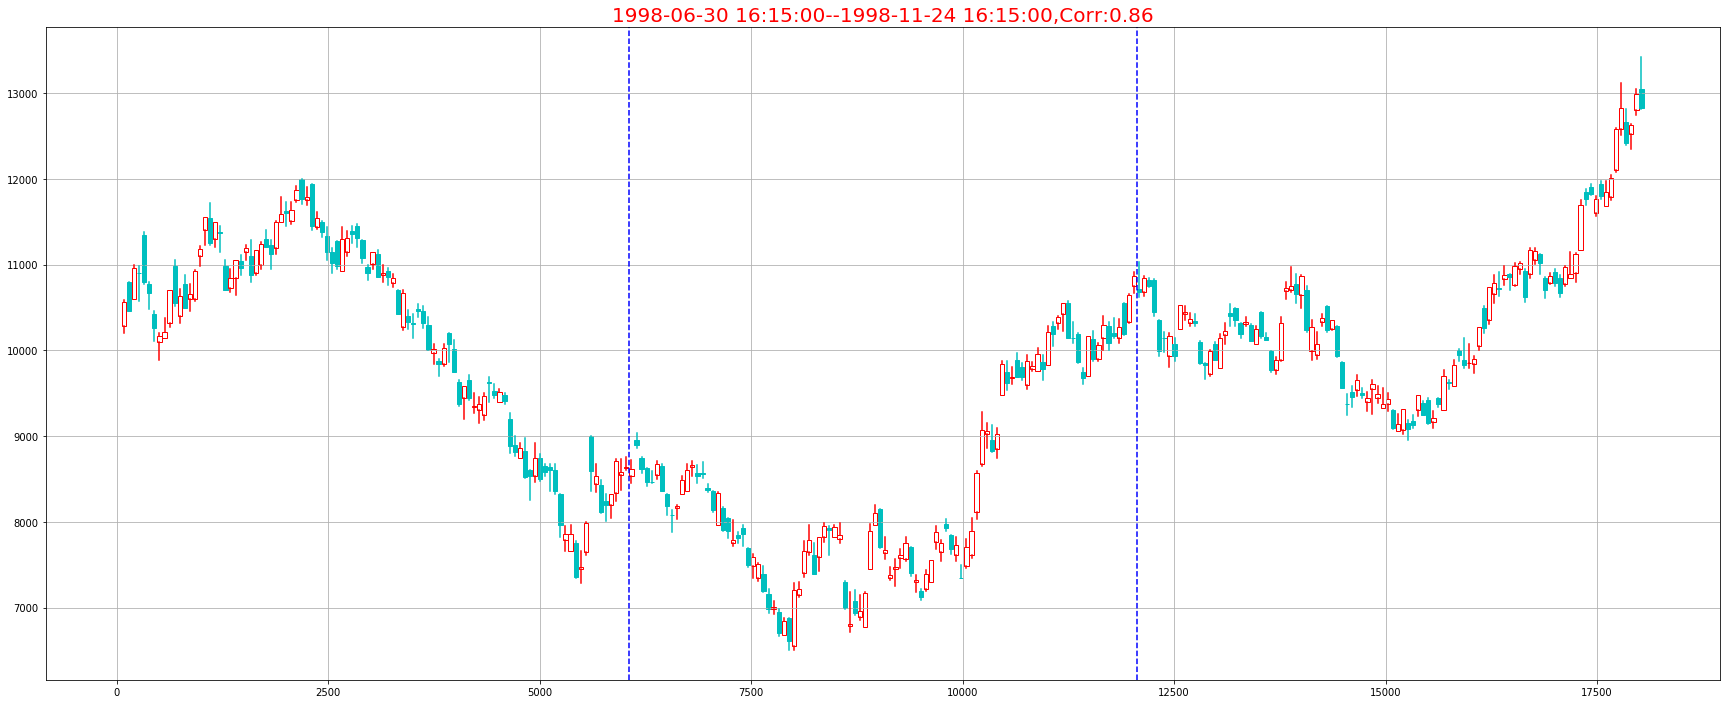

In [32]:
fig = plt.figure(figsize=(30, 12))
ax = fig.add_subplot(111)
DrawIndex(1,100,100)

In [33]:
def DrawIndex(ii,add1=0,add2=0):
    index=ii
    ind=newRec.index[index]
    if add1>ind:
        add1=ind
    begin=ind-add1
    end=begin+length+add2+add1
    df2=df1.iloc[begin:end]
    v1=newRec.iloc[index]['Res']
#     print(newRec.iloc[index],v1)
    file="res/%s.jpg"%(index)
    DrawKK(df2,add1=add1,add2=add2,corr=v1,file=file)

def DrawKK(aa,add1=0,add2=0,file='res/test.jpg',corr=0):
#     fig = plt.figure(figsize=(30, 12))
#     ax = fig.add_subplot(111)
#     ax1 = ax.twinx()

    ax.clear()
#     ax1.clear()
    k_width = 50
    k_diff = 10
    kline = k_width + k_diff
    d=0
    rows=len(aa)
    if add1>0:
        ax.axvline((add1+1)*kline,ymax=1,c='b',ls='dashed')
    if add2>0:
        ax.axvline((rows-add2+1)*kline,ymax=1,c='b',ls='dashed')
    for i in aa.iterrows():
        d=d+1
        x = d * kline
        O = i[1]['open']
        C = i[1]['close']
        L = i[1]['low']
        H = i[1]['high']
        hh = abs(C - O)
        x1 = x + k_width / 2
        if C > O:
            a = False
            y = O
            cc = 'R'
            # 上影线 下影线
            line1 = Line2D((x1, x1), (C, H), color=cc)
            line2 = Line2D((x1, x1), (O, L), color=cc)

            ax.add_line(line1)
            ax.add_line(line2)
        else:
            a = True
            y = C
            cc = 'C'
            # 影线
            line = Line2D((x1, x1), (L, H), color=cc)
            ax.add_line(line)
        hh = abs(C - O)

        # K线实体
        rec = Rectangle((x, y), k_width, hh, fill=a, color=cc)

        # MACD
        ax.add_patch(rec)



#     ax1.set_ylim(-200, 200)

    ax.grid()

    ax.autoscale_view()
    time1=aa.index[add1]
    if add2==0:
        diff=-1
    else:
        diff=-add2-1
    time2=aa.index[diff]
    title="%s--%s,Corr:%.3f" %(time1,time2,corr)
#     plt.legend(["col1","col2","col3"],loc="best")
    plt.title(title, fontsize=20, color='r')
#     fig.savefig(file)
    return plt


In [2]:
from KRData.HKData import HKFuture
import configparser
import datetime

conf_parser = configparser.ConfigParser()
conf_parser.read( 'conf.ini')
db_host = conf_parser.get('MGDB', 'host')
db_user = conf_parser.get('MGDB', 'user')
db_password = conf_parser.get('MGDB', 'password')

hk = HKFuture(pwd=db_password,host=db_host,user=db_user)
hk.get_all_codes()
_fields = ['datetime', 'code', 'open', 'high', 'low', 'close', 'vol']
hsi=hk.get_main_contract_bars('HSI', _fields)

In [44]:
d2=hsi['close'].values
len(d2)

1221197

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

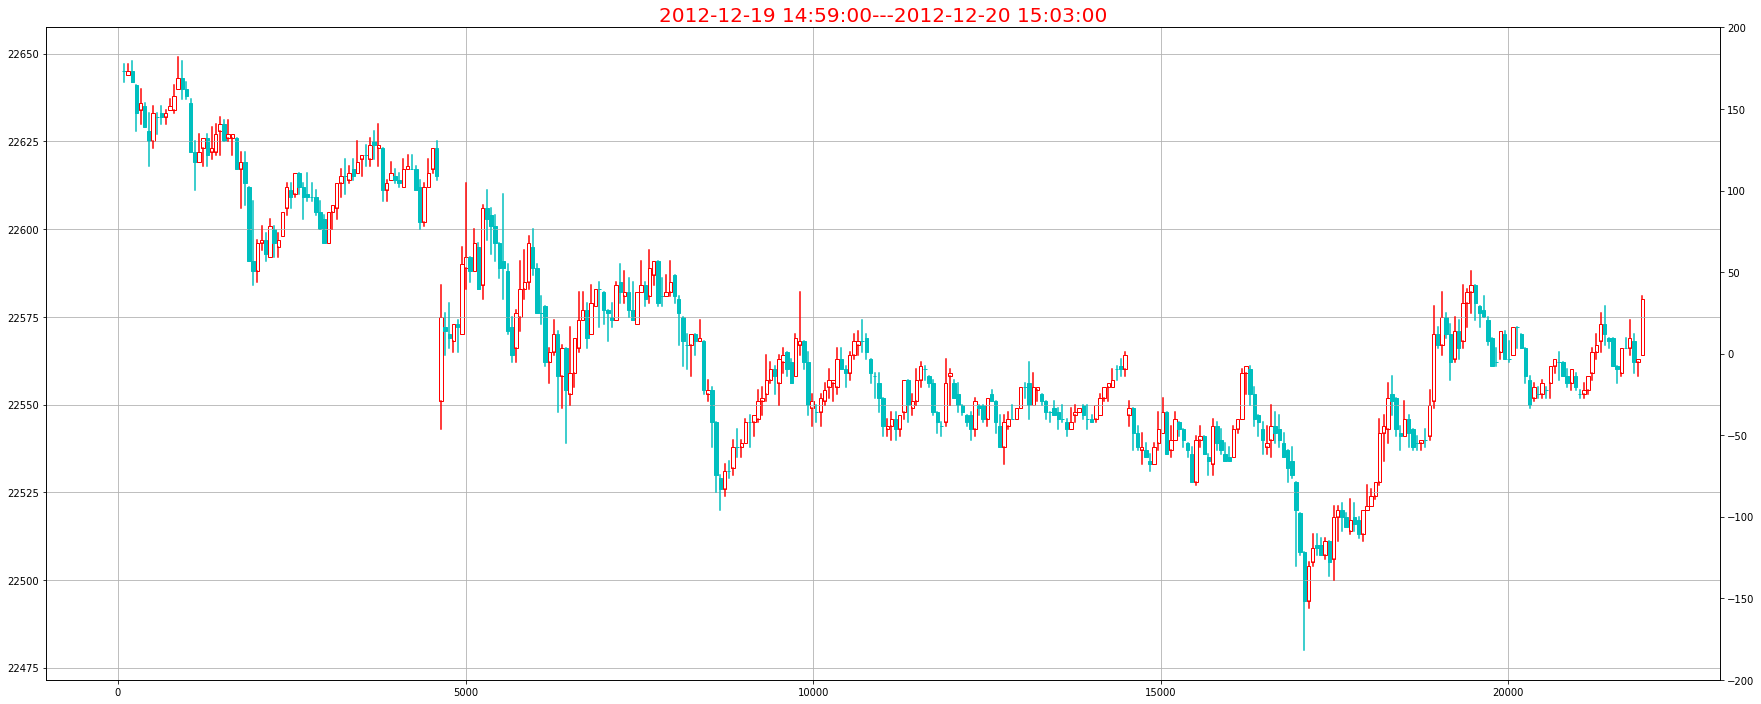

In [46]:
index=newRec.iloc[0]['Res']
df2=hsi.iloc[ind:ind+length+100]
DrawKK(df2)